On 20% of training data,number of features = 1828
Number of parameters of Logistic Regression = 1828
Number of support vectors learnt = 1079

On 40% of training data,number of features = 2088
Number of parameters of Logistic Regression = 2088
Number of support vectors learnt = 1725

On 60% of training data,number of features = 2147
Number of parameters of Logistic Regression = 2147
Number of support vectors learnt = 2251

On 80% of training data,number of features = 2156
Number of parameters of Logistic Regression = 2156
Number of support vectors learnt = 2743

On 100% of training data,number of features = 2159
Number of parameters of Logistic Regression = 2159
Number of support vectors learnt = 3224

-----MLPC-----
Validation accuracy in 20% of data is 0.7607361963190185
Validation accuracy in 40% of data is 0.803680981595092
Validation accuracy in 60% of data is 0.8466257668711656
Validation accuracy in 80% of data is 0.8732106339468303
Validation accuracy in 100% of data is 0.910020

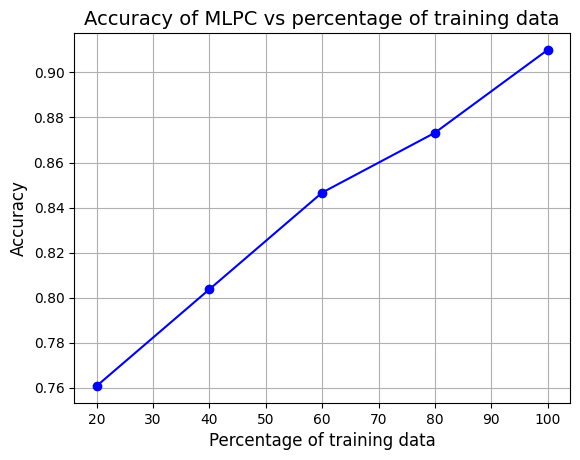

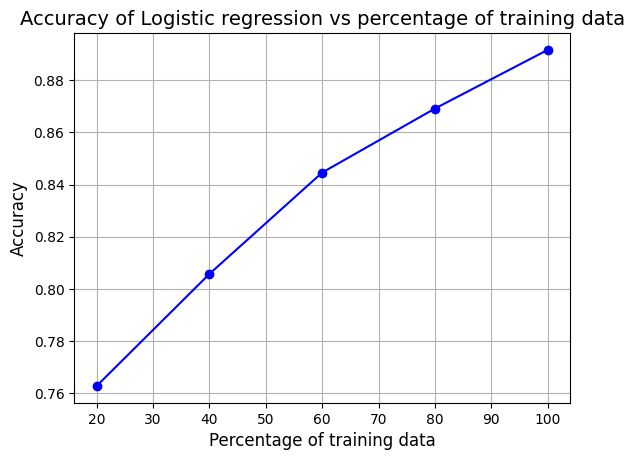

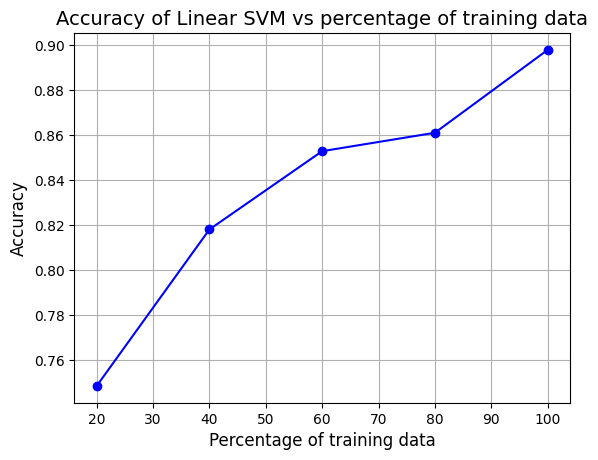

Plots are saved in Dataset1_mlpc.png, Dataset1_logreg.png and Dataset1_svm.png respectively


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt

dat = pd.read_csv("datasets/train/train_emoticon.csv")
df_split = dat['input_emoticon'].apply(list).apply(pd.Series)

df_split.columns = [f'emoji_{i+1}' for i in range(df_split.shape[1])]
emoji_columns = [f'emoji_{i}' for i in range(1, 14)]





percentages = [20,40,60,80,100]

X = df_split # Features (single emoji per column)
y = dat['label']

valdat = pd.read_csv("datasets/valid/valid_emoticon.csv")


Y_val = valdat['label']

valdf_split = valdat['input_emoticon'].apply(list).apply(pd.Series)


valdf_split.columns = [f'emoji_{i+1}' for i in range(valdf_split.shape[1])]
X_val = valdf_split

mlp_acc=[]
log_acc=[]
svm_acc=[]

for p in percentages:
    num = int(len(X)*(p/100))
    X_subset = X[:num]
    Y_subset = y[:num]
    encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")
    encoded_columns = encoder.fit_transform(X_subset[emoji_columns])
    encoded_col_names = encoder.get_feature_names_out(emoji_columns)

    X_subset = pd.DataFrame(encoded_columns, columns=encoded_col_names)
    
    val_encode = encoder.transform(X_val[emoji_columns])
    val_encode_cols = encoder.get_feature_names_out(emoji_columns)
    X_val_loop = pd.DataFrame(val_encode,columns=val_encode_cols)
    
    mlpc = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500)
    mlpc.fit(X_subset,Y_subset)
    mlpc_pred = mlpc.predict(X_val_loop)
    val_acc = accuracy_score(Y_val,mlpc_pred)
    mlp_acc.append(val_acc)
    print(f"On {p}% of training data,number of features = {X_subset.shape[1]}")
    logreg = LogisticRegression()
    logreg.fit(X_subset,Y_subset)
    log_pred = logreg.predict(X_val_loop)
    val_acc = accuracy_score(Y_val,log_pred)
    print(f"Number of parameters of Logistic Regression = {len(logreg.coef_[0])}")
    log_acc.append(val_acc)

    svc = svm.SVC(kernel='linear')
    svc.fit(X_subset,Y_subset)
    svc_pred = svc.predict(X_val_loop)
    val_acc = accuracy_score(Y_val,svc_pred)
    print(f"Number of support vectors learnt = {len(svc.support_)}\n")
    svm_acc.append(val_acc)
    

print("-----MLPC-----")
for idx,p in enumerate(percentages):
    print(f"Validation accuracy in {p}% of data is {mlp_acc[idx]}")

print("-----LOGISTIC REGRESSION-----")
for idx,p in enumerate(percentages):
    print(f"Validation accuracy in {p}% of data is {log_acc[idx]}")

print("-----LINEAR KERNEL SVM-----")
for idx,p in enumerate(percentages):
    print(f"Validation accuracy in {p}% of data is {svm_acc[idx]}")

plt.plot(percentages,mlp_acc,marker='o',color="blue")
plt.xlabel('Percentage of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of MLPC vs percentage of training data', fontsize=14)
plt.grid(True)
plt.savefig('Dataset1_mlpc.png', bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(percentages,log_acc,marker='o',color="blue")
plt.xlabel('Percentage of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Logistic regression vs percentage of training data', fontsize=14)
plt.grid(True)
plt.savefig('Dataset1_logreg.png', bbox_inches='tight')
plt.show()

plt.figure()
plt.plot(percentages,svm_acc,marker='o',color="blue")
plt.xlabel('Percentage of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Linear SVM vs percentage of training data', fontsize=14)
plt.grid(True)
plt.savefig('Dataset1_svm.png', bbox_inches='tight')
plt.show()

print("Plots are saved in Dataset1_mlpc.png, Dataset1_logreg.png and Dataset1_svm.png respectively")